# S03T02

## Exercici 1 - Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips"

#### Inicialitzem llibreries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#### Importem el csv a un DataFrame, i mostrem els primers resultats per veure que te el DataFrame

In [2]:
tips = pd.read_csv('S03T02\\tips.csv', sep = ',', encoding = 'utf-8')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Mirem quantes columnes i files te, en aquest cas 7 columes i 244 registres

In [45]:
tips.shape

(244, 7)

#### Obtenim el nº de dimensions

In [46]:
tips.ndim

2

#### Obtenim els index de les columnes

In [47]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

#### Obtenim els tipus de les columnes

In [48]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

#### Afegim una columna amb el % que de la propina sobre el total

In [3]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


#### Treiem informació de la columna tip

In [33]:
print(tips['tip'].min())
print(tips['tip'].max())
print(tips['tip'].mean())
print(tips['tip'].std())
print(tips['tip'].count())
print(tips['tip'].describe())

1.0
10.0
2.9982786885245902
1.3836381890011826
244
count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64


#### Agrupem per fumador

In [4]:
grouped_data = tips.groupby('smoker')
grouped_data.describe()
#grouped_data.mean()


total_bill                                                           \
            count       mean       std   min     25%    50%     75%    max   
smoker                                                                       
No          151.0  19.188278  8.255582  7.25  13.325  17.59  22.755  48.33   
Yes          93.0  20.756344  9.832154  3.07  13.420  17.92  26.860  50.81   

          tip            ... size      tip_pct                              \
        count      mean  ...  75%  max   count       mean        std   min   
smoker                   ...                                                 
No      151.0  2.991854  ...  3.0  6.0   151.0  19.223709   5.766671  6.02   
Yes      93.0  3.008710  ...  3.0  5.0    93.0  21.817742  25.429627  3.70   

                                       
           25%    50%     75%     max  
smoker                                 
No      15.865  18.43  22.705   41.24  
Yes     11.950  18.18  24.230  245.24  

[2 rows x 32 columns]

#### Agrupem per fumador i sumem la propina (tip)

In [45]:
#species_counts = tips.groupby('smoker')['smoker'].count()
species_counts = tips.groupby('smoker')['tip'].sum()
print(species_counts)

smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64


#### Agrupem per fumador, i afegim les columnes que volem amb la operació que volem, el pd.Series.nunique ens fa un distinct count

In [107]:
tips.groupby(['smoker']).agg({'tip': ['sum','count'],'total_bill':'sum','size':'sum','sex':'count','day':pd.Series.nunique,'time':pd.Series.nunique})


tip       total_bill size   sex     day    time
           sum count        sum  sum count nunique nunique
smoker                                                    
No      451.77   151    2897.43  403   151       4       2
Yes     279.81    93    1930.34  224    93       4       2

#### Grafica de fumadors

In [67]:
print(tips.groupby(['day']).agg({'tip_pct':'min'}))
print(tips.groupby(['day']).agg({'tip_pct':'max'}))
print(tips.groupby(['day']).agg({'tip_pct':np.average}))
#tips.groupby(['day']).sum()


      tip_pct
day          
Fri     11.55
Sat      3.70
Sun      6.32
Thur     7.87
      tip_pct
day          
Fri     35.77
Sat     48.31
Sun    245.24
Thur    36.30
        tip_pct
day            
Fri   20.860000
Sat   18.530690
Sun   22.571579
Thur  19.481935


#### Apunts meus

In [84]:
dp2=tips.groupby(['day'])['tip_pct'].mean()

dp2

day
Fri     20.860000
Sat     18.530690
Sun     22.571579
Thur    19.481935
Name: tip_pct, dtype: float64

In [114]:
#dp2.index
for xx in dp2.index :
    incide=xx
    media=dp2[xx]
    var=incide
    total=tips.query('day == @var').groupby(['day'])['tip_pct'].sum()[0]
    print(total)

396.34000000000003
1612.17
1715.44
1207.88


In [105]:
var='Fri'
a=tips.query('day == @var').groupby(['day'])['tip_pct'].sum()[0]
print(a)


396.34000000000003


#### Fi apunts meus

#### Gràfica de barres amb el promig de les propines per dia de la setmana. La franja negra proporciona alguna indicació de la incertesa al voltant daquesta estimació

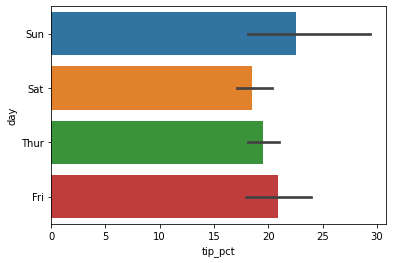

In [5]:
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

#### Grafica de barres amb el promig de les propines, pero agrupat pel camp Sex. Apareixeran tantes columes per dia com valors tingui el camp Sex, en aquest cas 2

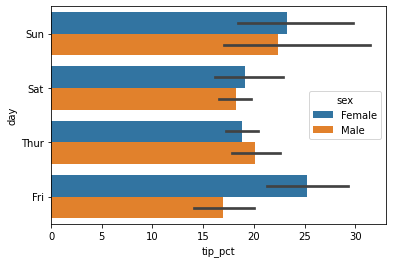

In [126]:
sns.barplot(x='tip_pct', y='day', hue='sex', data=tips, orient="h")
plt.show()


In [53]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [54]:
round(tips.describe(include='all'), 3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [55]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [56]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

#### Copia dades del exercici de mostra, aquesta linia m'ha donat error round((tips['tip']).median(), 3), ho he canviat per:

In [66]:
(tips['tip']).median().round(3)
#round((tips['tip']).median(), 3)

2.9

#### Grafica de "bigote" resumeix la distribució de les dades mostrant-nos la posició dels seus quartils i dels valors atípics (outliers)

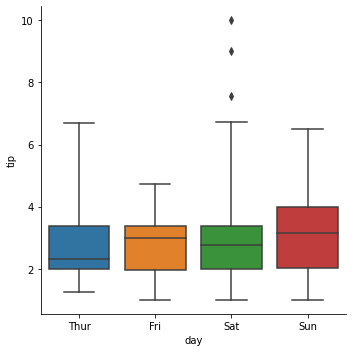

In [125]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box",order=['Thur','Fri','Sat','Sun'], whis = 3)

### Grafica de "bigote" agrupan per la columa sex

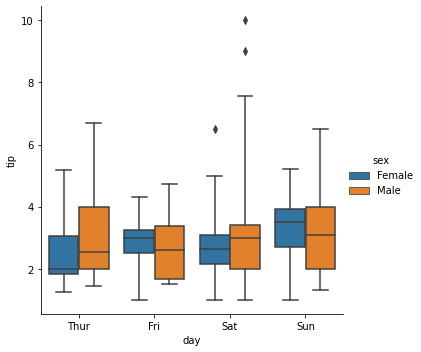

In [6]:
sns.catplot(x = "day", y = "tip", data = tips, kind = "box",order=['Thur','Fri','Sat','Sun'], whis = 3, hue='sex')

# Una Variable: 1 Numérica = 'tip_pct'

#### Una grafica ámb un valor pot ser un histograma. Un histograma agrupa els valores en x nùmero de columnes. En el cas de la columa 'sex' com que nomes te dos valors, es veu clarament

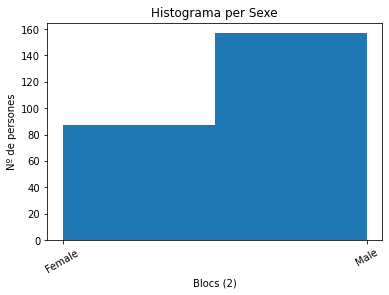

In [166]:
bns=2
plt.hist(tips['sex'],bns)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Histograma per Sexe")
plt.xlabel("Blocs (" + str(bns) + ")")
plt.ylabel("Nº de persones")
plt.show()

#### Aquí fem servir la funció skew per obtindre el nº mes aproximat de columnes que necessitem per representar les dades. En aquesta grafica hem agafat el tip_pct

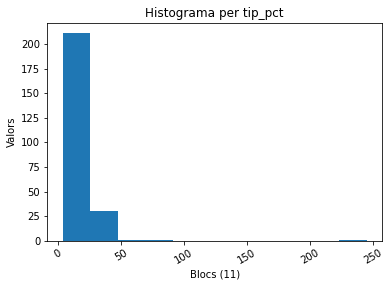

In [167]:
from scipy.stats import skew
bns = round((tips['tip_pct'].skew(axis=0))+0.5)
plt.hist(tips['tip_pct'], bins = bns)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Histograma per tip_pct")
plt.xlabel("Blocs (" + str(bns) + ")")
plt.ylabel("Valors")
plt.show()

#### Aquí fem servir la funció skew per obtindre el nº mes aproximat de columnes que necessitem per representar les dades. En aquesta grafica hem agafat el size

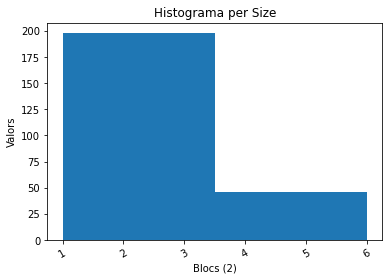

In [168]:
from scipy.stats import skew
bns = round((tips['size'].skew(axis=0))+0.5)
plt.hist(tips['size'], bins = bns)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Histograma per Size")
plt.xlabel("Blocs (" + str(bns) + ")")
plt.ylabel("Valors")
plt.show()

#### Aquí fem servir la funció skew per obtindre el nº mes aproximat de columnes que necessitem per representar les dades. En aquesta grafica hem agafat el camp day

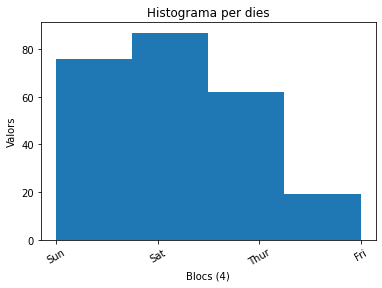

In [169]:
from scipy.stats import skew
#bns = round((tips['day'].skew(axis=0))+0.5)
bns=4
plt.hist(tips['day'], bins = bns)
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Histograma per dies")
plt.xlabel("Blocs (" + str(bns) + ")")
plt.ylabel("Valors")
plt.show()

# Dos Variables: 1 Categórica = 'day', 1 Numérica = 'tip_pct'

#### Mostrem el % de propines per dia de la setmana

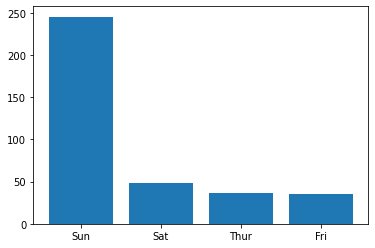

In [177]:
plt.bar(tips['day'], tips['tip_pct'], 0.8)
plt.show()

#### Mostrem el total de ventes per dia de la setmana

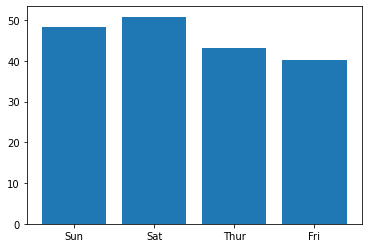

In [178]:
plt.bar(tips['day'], tips['total_bill'], 0.8)
plt.show()
#bb.groupby(['day']).agg({'total_bill':np.average})

#### Generem dos grafiques separades per la columna smoker

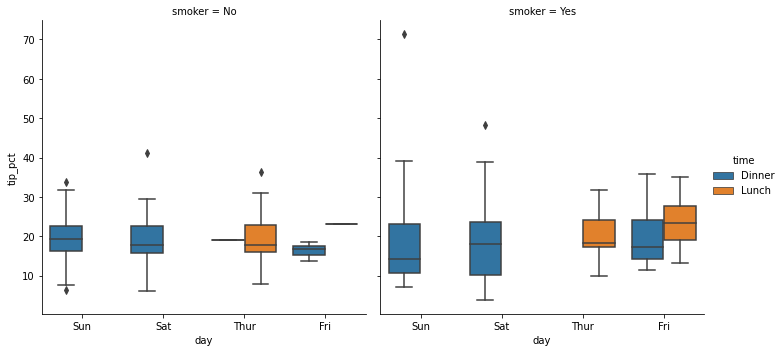

In [9]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

## Exercici 2

#### Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

#### Importem el fitxer de movies i mostrem el primers per veure el contingut

In [12]:
mov=pd.read_csv('S03T02\\movies.dat', sep="::", header=None)
mov.head()

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### Donem noms a les columnes 

In [20]:
mov=mov.rename(columns={mov.columns[0]: 'id',mov.columns[1]: 'Pelicula',mov.columns[2]: 'Genere'})
mov.head()

,id,Pelicula,Genere
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### Extreiem l'any de la columna pelicula

In [33]:
mov['Any'] = mov['Pelicula'].str[-7:]
mov.head()

,id,Pelicula,Genere,Any
0,1,Toy Story (1995),Animation|Children's|Comedy,(1995)
1,2,Jumanji (1995),Adventure|Children's|Fantasy,(1995)
2,3,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,4,Waiting to Exhale (1995),Comedy|Drama,(1995)
4,5,Father of the Bride Part II (1995),Comedy,(1995)


#### Eliminem l'any de la columna pelicula

In [35]:
mov['Pelicula'] = mov['Pelicula'].str[:-7]
mov.head()

,id,Pelicula,Genere,Any
0,1,Toy Story,Animation|Children's|Comedy,(1995)
1,2,Jumanji,Adventure|Children's|Fantasy,(1995)
2,3,Grumpier Old Men,Comedy|Romance,(1995)
3,4,Waiting to Exhale,Comedy|Drama,(1995)
4,5,Father of the Bride Part II,Comedy,(1995)


#### Eliminem els parentesis de la columna any

In [49]:
mov['Any'] = mov['Any'].str.replace('(','', regex=True).str.replace(')','', regex=True)
mov.head()


,id,Pelicula,Genere,Any
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


#### Separem cada genere de la columna genere

In [58]:
mov[['G1','G2','G3','G4','G5','G6']] = mov['Genere'].str.split('|',expand=True)
mov.head()



,id,Pelicula,Genere,Any,G1,G2,G3,G4,G5,G6
0,1,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None,None,None
1,2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None


#### Canviem el tipus de dade de la columna Any, la passen a tipus Int

In [73]:
mov['Any']=mov['Any'].astype(str).astype(int)
mov.dtypes

id           int64
Pelicula    object
Any          int32
G1          object
G2          object
G3          object
G4          object
G5          object
G6          object
dtype: object

#### Fem una columna nova (Lus) que ens indicarà la decada de la pelicula

In [88]:
mov['Lus']=(mov['Any']/10).apply(np.floor)*10
mov.head()

,id,Pelicula,Any,G1,G2,G3,G4,G5,G6,Lus
0,1,Toy Story,1995,Animation,Children's,Comedy,None,None,None,1990.0
1,2,Jumanji,1995,Adventure,Children's,Fantasy,None,None,None,1990.0
2,3,Grumpier Old Men,1995,Comedy,Romance,None,None,None,None,1990.0
3,4,Waiting to Exhale,1995,Comedy,Drama,None,None,None,None,1990.0
4,5,Father of the Bride Part II,1995,Comedy,None,None,None,None,None,1990.0


#### Fem la gràfica de les pelicules per any

Text(0, 0.5, 'Nº Pelicules')

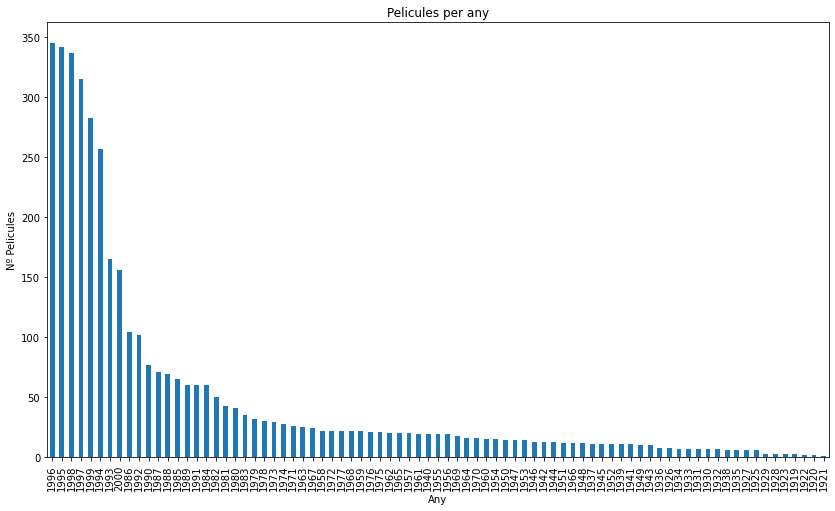

In [94]:
ax = mov['Any'].value_counts().plot(kind='bar',figsize=(14,8),title="Pelicules per any")
ax.set_xlabel("Any")
ax.set_ylabel("Nº Pelicules")

#### Fem la gràfica de pelicules per dècada

Text(0, 0.5, 'Frequency')

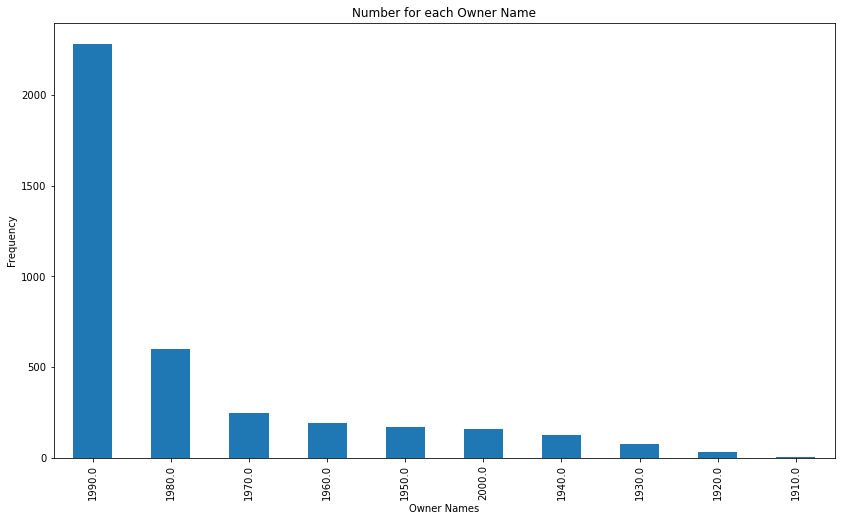

In [89]:
ax = mov['Lus'].value_counts().plot(kind='bar',figsize=(14,8),title="Pelicules per decada")
ax.set_xlabel("Decada")
ax.set_ylabel("Nº Pelicules")

#### Apunts meus

In [120]:
rr=set(mov['G1']).union(set(mov['G2'])).union(set(mov['G3'])).union(set(mov['G4'])).union(set(mov['G5'])).union(set(mov['G6']))
rr.remove(None)
gen=pd.DataFrame(rr,columns=['Genero'])


         Genero
0       Western
1        Sci-Fi
2        Horror
3     Adventure
4        Action
5         Crime
6     Animation
7       Musical
8    Children's
9        Comedy
10          War
11      Romance
12  Documentary
13      Mystery
14    Film-Noir
15      Fantasy
16        Drama
17     Thriller


#### Apunts meus

In [123]:
pd.merge(gen,mov,left_on='Genero',right_on='G1')


,Genero,id,Pelicula,Any,G1,G2,G3,G4,G5,G6,Lus
0,Western,210,Wild Bill,1995,Western,None,None,None,None,None,1990.0
1,Western,383,Wyatt Earp,1994,Western,None,None,None,None,None,1990.0
2,Western,416,Bad Girls,1994,Western,None,None,None,None,None,1990.0
3,Western,553,Tombstone,1993,Western,None,None,None,None,None,1990.0
4,Western,599,"Wild Bunch, The",1969,Western,None,None,None,None,None,1960.0
...,...,...,...,...,...,...,...,...,...,...,...
3878,Thriller,3798,What Lies Beneath,2000,Thriller,None,None,None,None,None,2000.0
3879,Thriller,3835,"Crush, The",1993,Thriller,None,None,None,None,None,1990.0
3880,Thriller,3849,"Spiral Staircase, The",1946,Thriller,None,None,None,None,None,1940.0
3881,Thriller,3857,Bless the Child,2000,Thriller,None,None,None,None,None,2000.0


#### Agrupem tots els gèneres en un dataframe, amb l'id , l'any i la dècada

In [189]:
gen=pd.DataFrame(mov[['id','G6','Any','Lus']].loc[mov['G6'].notnull()])
gen.rename(columns={'G6': 'G5'}, inplace=True)
gen=pd.concat([gen,mov[['id','G5','Any','Lus']].loc[mov['G5'].notnull()]])
gen.rename(columns={'G5': 'G4'}, inplace=True)
gen=pd.concat([gen,mov[['id','G4','Any','Lus']].loc[mov['G4'].notnull()]])
gen.rename(columns={'G4': 'G3'}, inplace=True)
gen=pd.concat([gen,mov[['id','G3','Any','Lus']].loc[mov['G3'].notnull()]])
gen.rename(columns={'G3': 'G2'}, inplace=True)
gen=pd.concat([gen,mov[['id','G2','Any','Lus']].loc[mov['G2'].notnull()]])
gen.rename(columns={'G2': 'G1'}, inplace=True)
gen=pd.concat([gen,mov[['id','G1','Any','Lus']].loc[mov['G1'].notnull()]])
print(gen)


        id        G1   Any     Lus
1187  1205       War  1986  1980.0
69      70  Thriller  1996  1990.0
255    258   Romance  1995  1990.0
554    558   Fantasy  1994  1990.0
606    610    Sci-Fi  1981  1980.0
...    ...       ...   ...     ...
3878  3948    Comedy  2000  2000.0
3879  3949     Drama  2000  2000.0
3880  3950     Drama  2000  2000.0
3881  3951     Drama  2000  2000.0
3882  3952     Drama  2000  2000.0

[6408 rows x 4 columns]


#### Fem una gràfica amb les pelicules per gènere

Text(0, 0.5, 'Nº Pelicules')

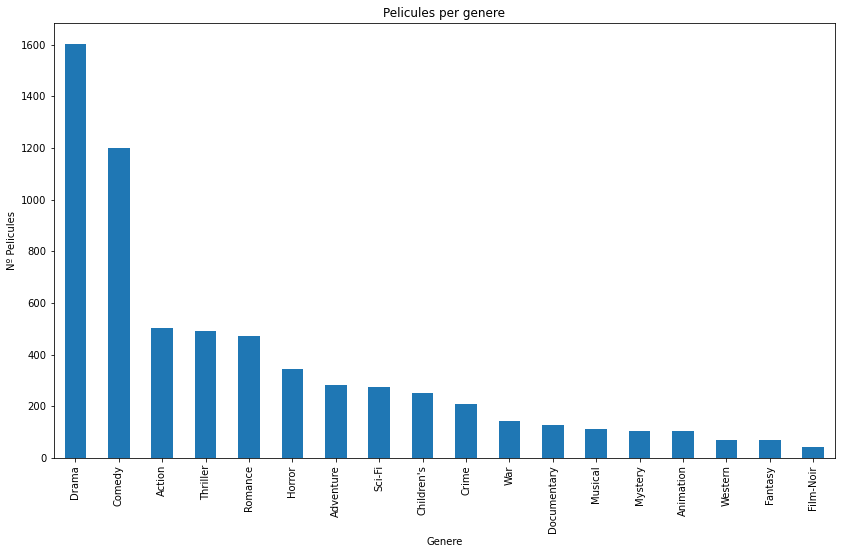

In [180]:
ax = gen['G1'].value_counts().plot(kind='bar',figsize=(14,8),title="Pelicules per genere")
ax.set_xlabel("Genere")
ax.set_ylabel("Nº Pelicules")

# Exercici 3

#### En aquest exercici no us donarem gaires indicacions perquè volem que ens mostreu la vostra creativitat. Sorprèn-me amb gràfiques i interpretacions del dataset "movies.dat" del exercici anterior.

#### Fem una gràfica de bifote on visualitzem els gèneres de les pelicules. Es interessant perque es pot veure el anys de mes creació de pelicules per gènere, com el Western, Musical y Film-Noir, que tenen un any molt definit.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Animation'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Comedy'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Drama'),
  Text(5, 0, 'Thriller'),
  Text(6, 0, 'Crime'),
  Text(7, 0, 'Romance'),
  Text(8, 0, "Children's"),
  Text(9, 0, 'Documentary'),
  Text(10, 0, 'Sci-Fi'),
  Text(11, 0, 'Horror'),
  Text(12, 0, 'Western'),
  Text(13, 0, 'Mystery'),
  Text(14, 0, 'Film-Noir'),
  Text(15, 0, 'War'),
  Text(16, 0, 'Fantasy'),
  Text(17, 0, 'Musical')])

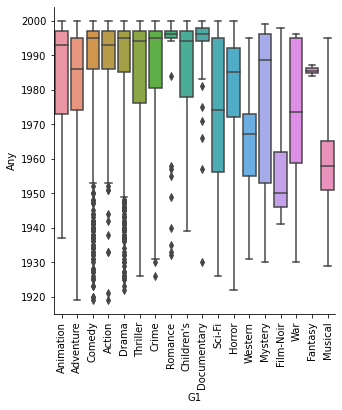

In [193]:
sns.catplot(x = "G1", y = "Any", data = mov, kind = "box", whis = 3)
plt.xticks(rotation=90, horizontalalignment="center")